# ANALISI DELL'INFILTRAZIONE IN UNA COLONNA DI SUOLO

La seguente elaborazione analizza i fenonemi d'infiltrazione e di deflusso superficiale in diverse colonne stratigrafiche. Tale processo è suddiviso nelle seguenti parti :

- 1)INTRODUZIONE

    - 1.1 Introduzione teorica;
    - 1.2 Pre-processing.


- 2)PROFILI STRATIGRAFICI DELLA COLONNA DI SUOLO

    - 2.1 Primo profilo stratigrafico;
    - 2.2 Secondo profilo stratigrafico;
    - 2.3 Terzo profilo stratigrafico.


- 3)ANALISI DEL PRIMO PROFILO STRATIGRAFICO

    - 3.1 Precipitazione estrema;
    - 3.2 Water Ponding;
    - 3.3 Evento di precipitazione.


- 4)ANALISI DEL DEFLUSSO SUPERFICIALE

    - 4.1 Deflusso hortoniano;
    - 4.2 Deflusso dunniano.

---

## 1. INTRODUZIONE

### **1.1 Introduzione teorica**

In questo notebook si presenta il comportamento di un terreno stratificato rispetto alla filtrazione dell'acqua, in funzione di diverse condizioni. 
Il fenomeno può essere modellizzato matematicamente attraverso l'**equazione di Richards**:

$${C(\psi)}{\frac{\partial (\psi)}{\partial t}}={{\nabla K(\theta w)}{\cdot \nabla(z+\psi)} +{K(\theta w)} (\nabla^2 (x+\psi))   }$$


Quest'ultima si ricava prendendo in considerazione : l'equazione della SWRC (curve di ritenzione idrica), l'equazione di continuità (l'equazione di conservazione della massa) e l'equazione di Darcy-Buckingham.

Per risolvere l'equazione di Richards bisogna in primo luogo definire geometricamente il dominio di integrazione e successivamente impostare le condizioni iniziali e al contorno.
Nel modello preso in considerazione si parte da una condizione idrostatica (cioè di equilibrio) in modo tale che le variazioni di suzione siano dovute esclusivamente alle condizioni al contorno.

Queste ultime rappresentano il variare della suzione sul contorno in ogni istante di tempo e sono di due tipologie:
- condizione al contorno di Neumann;
- condizione al contorno di Dirichlet.

Nei seguenti notebook viene trattata una semplificazione del modello, ipotizzandolo 1D:

$$ {\frac{\partial (\theta w)}{\partial t}} = { \frac{\partial (  {K(\theta w)} {\frac{ \partial (\psi + z)}{\partial z }} )}{\partial z}    } $$

In tale modello si utilizzano le equazioni di Richards definite utilizzanto una formulazione discreta (vengono sostituite le derivate parziali con le differenze finite).

Questo modello vale su un versante piano e assumendo la conducibilità idraulica K costante in ogni singolo strato di suolo.

Per la valutazione del fenomeno si utilizza, oltre al modello matematico precedentemente descritto, anche un metodo numerico definito su una griglia in cui calcolare la soluzione.

---

### **1.2 Pre-processing**

Tutte le informazioni sono contenute nella cartella `/data` del progetto OMS.
Tali informazioni sono organizzate come segue:
- `data/Grid_input` : contiene il file .csv necessario per definire la griglia computazionale. 

Tale gliglia è elaborata da WHETGEO1D_RichardsCoupled_Computational_grid.ipynb e necessita di 3 file relativi a:

    - gliglia computazionale;
    - condizioni iniziali;
    - parametri del suolo;
    
- `data/Grid_NetCDF` : contiene i file netCDF (.nc). In tali file sono contenuti i dati relativi a griglia computazionale, parametri del suolo, quantità geometriche e condizioni iniziali.

- `/data/Timeseries` : contiene le serie temporali (file .csv) relative alle condizioni al contorno e al time step che si vuole utilizzare. 

---

### Parametri del suolo

Ogni singolo strato di suolo è identificato da un numero ed caratterizzato da un spessore e da una specifica conducibilità idraulica K.

---

### Definizione della griglia computazionale

Per utilizzare le equazioni di Richards è necessario sostituite le derivate parziali (formulazione continua) con le differenze finite (formulazione discreta).

Per passare da un dominio continuo ad uno discreto si suddivide il dominio continuo in delle griglie le quali sono definite mediante dei punti intermedi chiamati centroidi.

Per tali punti sono noti il contenuto d'acqua e la suzione, di conseguenza è possibile calcolare l'equazione di Richards.
La qualità del dominio discreto aumenta all'aumentare del numero di punti che vengono definiti.

La griglia di calcolo è costituita da:
- Layer (strati di terreno omogeneo);
- volumi di controllo;
- centroidi del volume di controllo;
- interfaccia del volume di controllo.

La griglia di calcolo viene creada da un notebook denominato WHETGEO1D_RichardsCoupled_Computational_grid.ipynb e necessita in input di 3 file .csv contenenti:
- geometria della colonna di suolo (grid_input_file_name.csv);
- condizioni iniziali (ic_input_file_name.csv);
- parametri SWRC (parameter_input_file_name .csv);


#### **Geometria della colonna di suolo**

Il file contiene 5 colonne:

| Type    | eta   | K      | equationStateID   | parameterID |
|---------|-------|--------|-------------------|-------------|
 
Dove:

- **Type** : colonna contenente L o M.

Nello specifico L identifica un layer. La prima riga (superficie) e l'ultima riga (fondo della colonna di suolo) devono essere sempre dei layer (L). Ad eccezione della prima e ultima riga non è necessario fornire una valore della suzione.

In particolare, nella prima  riga si hanno valori positivi della suzione se si ha ‘water ponding’ altrimenti valori negativi per suolo insaturo. Nell’ultima riga, la suzione è determinata ipotizzando la posizione della falda.

M identifica un punto di misura della suzione. Questo punto deve appartenere al dominio di calcolo sia perchè lo si vuole utilizzare per ricostruire il profilo iniziale della suzione, sia per validare la soluzione calcolata.

- **eta** : è la coordinata verticale positiva verso l’alto con 
origine fissata alla superficie. Unità di misura [m].

- **K** : definisce il numero di volumi di controllo in cui deve essere discretizzato il layer. Maggiore è il numero dei volumi di controllo
maggiore sarà l’accuratezza della soluzione e anche il tempo computazionale.

- **equationStateID** : è un parametro che indica quale equazionne di stato utilizzare.

- **parameterID** : numero che si riferisce al set di parametri del suolo scelto.

#### **Condizioni iniziali**

Il file contiene 3 colonne:

| Eta     | Psi0  | T0     | 
|  :---:  | :---: | :---:  |    

Dove:

- **Psi0** : valore della condizione iniziale per la suzione.

- **T0** : valore della condizione iniziale per la temperatura del suolo.
    

#### **Parametrizzazioni delle SWRC**

Le parametrizzazioni delle SWRC utilizzate sono:

- **Van Genuchten**

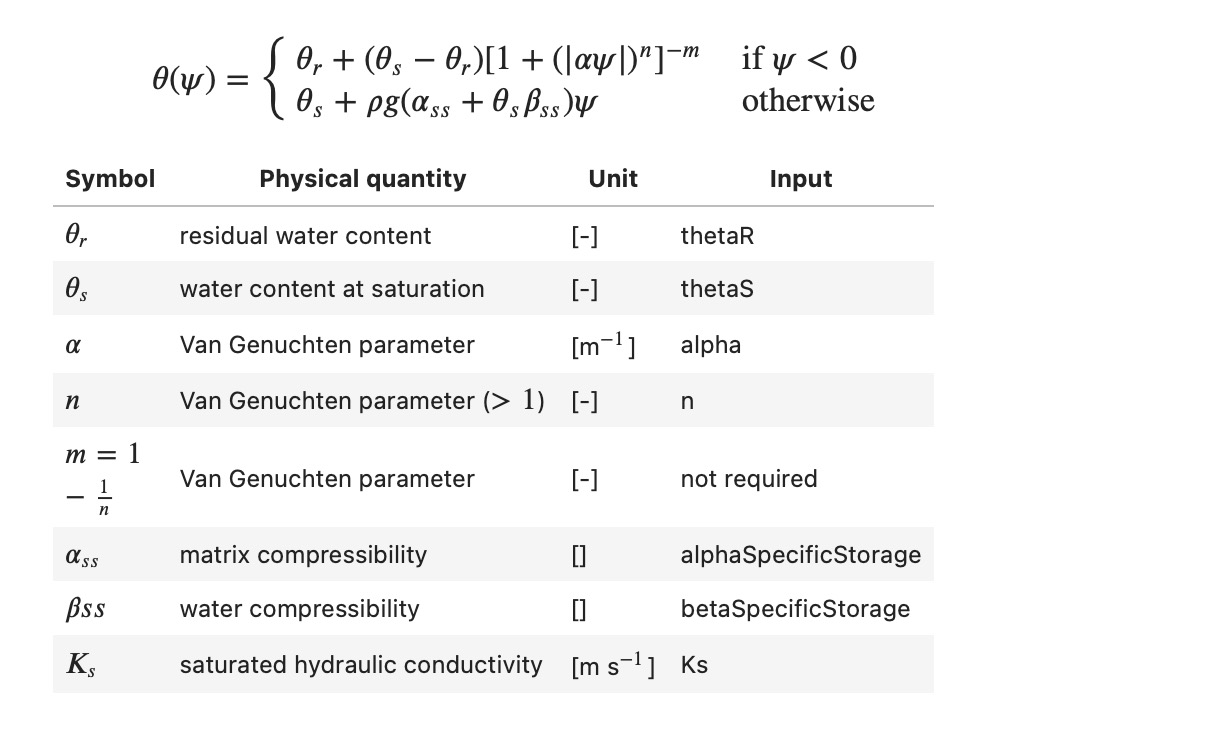

In [14]:
import os
from IPython.display import Image
percorso_dati_imm = os.path.dirname(os.getcwd())
Image(percorso_dati_imm + "/Jupyter_Notebook/VG.png")

- **Brooks- Corey**

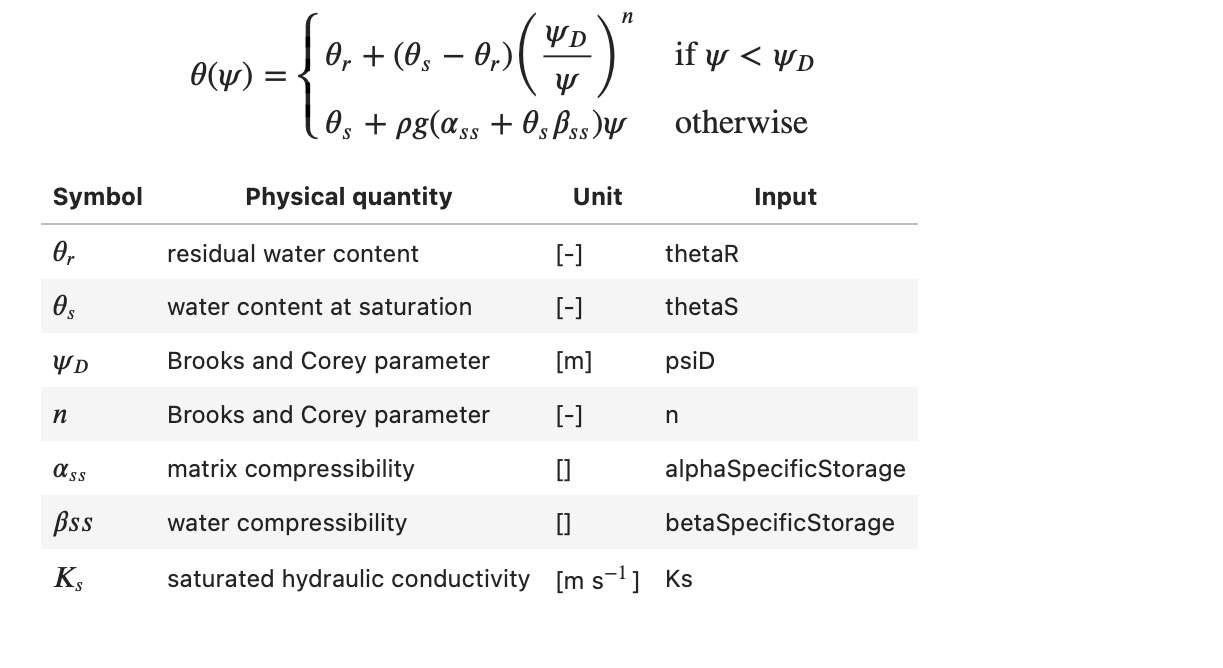

In [15]:
import os
from IPython.display import Image
percorso_dati_imm = os.path.dirname(os.getcwd())
Image(percorso_dati_imm + "/Jupyter_Notebook/BC.png")

- **Kosugi**

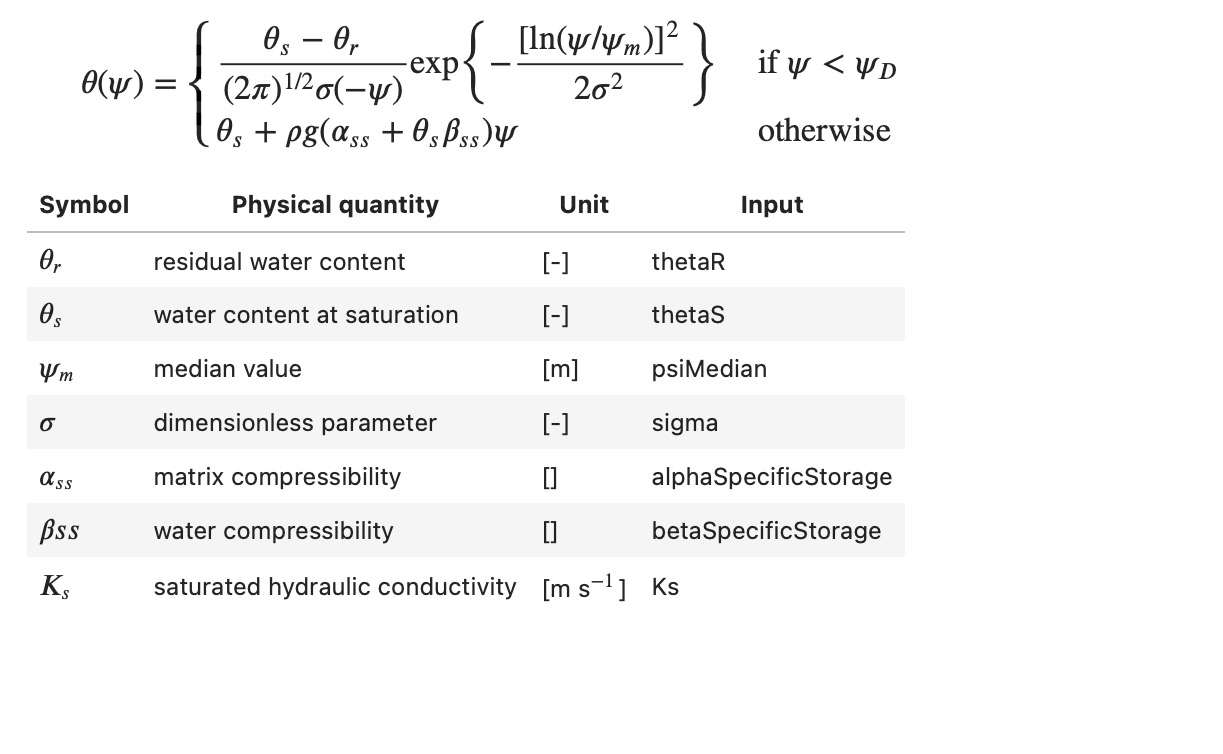

In [16]:
import os
from IPython.display import Image
percorso_dati_imm = os.path.dirname(os.getcwd())
Image(percorso_dati_imm + "/Jupyter_Notebook/Kos.png")

- **Romano**

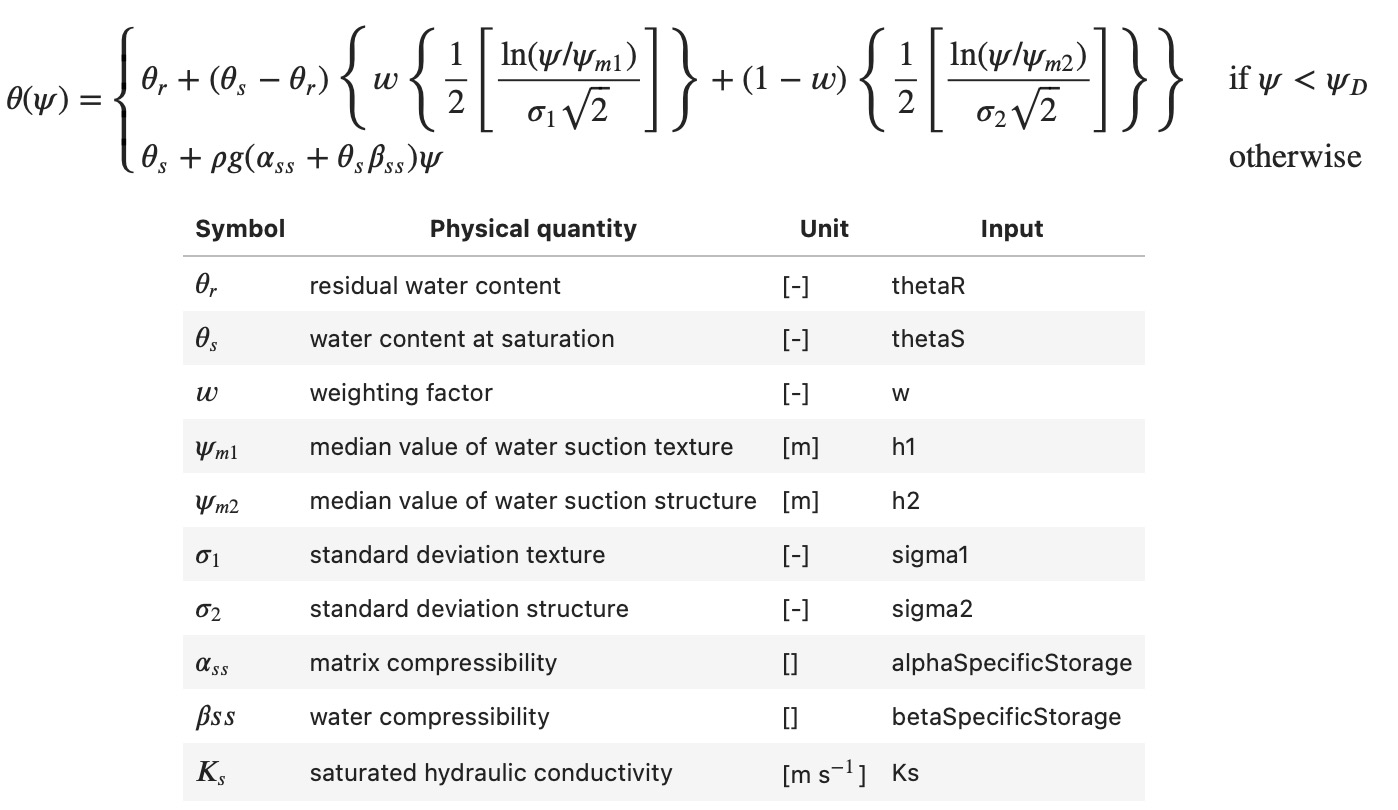

In [18]:
import os
from IPython.display import Image
percorso_dati_imm = os.path.dirname(os.getcwd())
Image(percorso_dati_imm + "/Jupyter_Notebook/Rom.png")